### Emotion Detector App using StreamIt
- Detecting Emotion
- Text Classifier

In [11]:
!pip install xgboost

In [46]:
# Import Packages

import joblib
# Exploratory Data Anaylsis (EDA) Packages
import pandas as pd
import numpy as np

# Visualization Packages 
import seaborn as sns
import matplotlib.pyplot as plt

# Text Cleaning
import neattext.functions as nfx

# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [13]:
# Setting Properties
pd.set_option('display.max_columns', None)

In [14]:
# Load the dataset
df = pd.read_csv("../Data/emotion_dataset_raw.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [16]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [17]:
# Counting rows for emotion types
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

Text(0.5, 1.0, 'Count of different Emotions')

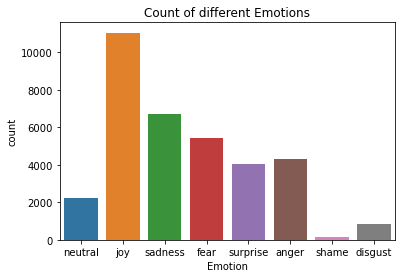

In [18]:
# Plot count of emotions
sns.countplot(x='Emotion', data=df)
plt.title('Count of different Emotions')


In [19]:
df.shape

(34792, 2)

In [20]:
df.drop_duplicates()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [21]:
df.shape


(34792, 2)

In [22]:
df.drop_duplicates().shape

(31162, 2)

In [23]:
df = df.drop_duplicates()

In [24]:
df.drop_duplicates(['Text']).shape

(31110, 2)

In [25]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [26]:
#Removing stopwords
df['CleanText'] = df['Text'].apply(nfx.remove_stopwords)

In [27]:
#Removing user handles
df['CleanText'] = df['CleanText'].apply(nfx.remove_userhandles)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df['CleanText'], df['Emotion'], test_size = 0.2, random_state = 30)

In [29]:
pipeline_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [30]:
pipeline_lr.fit(x_train, y_train)

C:\Users\dhruv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [31]:
sample = "I am feeling good"

In [32]:
pipeline_lr.predict([sample])

array(['joy'], dtype=object)

In [33]:
pipeline_lr.predict_proba([sample])

array([[0.02366239, 0.09166467, 0.03032705, 0.54466948, 0.10351696,
        0.11827704, 0.00201665, 0.08586575]])

In [34]:
pipeline_lr.classes_


array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [35]:
pipeline_lr.score(x_test, y_test)

0.5811005936146318

In [36]:
with open("../Models/emotion_classifier.pkl", "wb") as ec:
    joblib.dump(pipeline_lr, ec)

In [39]:
class md:
  bold = '\033[1m'
  end = '\033[0m'

In [48]:
def buildModels(x_train, x_test, y_train, y_test):
    '''
    Lightweight script to test many models and find winners:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = results = names = []
    
    models = [
      ('LGR', LogisticRegression()),
      ('RFC', RandomForestClassifier()),
      ('KNN', KNeighborsClassifier()),
      ('SVM', SVC(probability=True))
      ('XGB', XGBClassifier()),
      ('ETC', ExtraTreesClassifier()),
      ('KMC', KMeans()),
      ('DTC', DecisionTreeClassifier()),
      ('RDC', RidgeClassifier()),
      ('ADA', AdaBoostClassifier())
    ]
    
    modelScore = []
    for model in models:
        print(md.bold + "========================================  " + model[0] + "  ========================================" + md.end)
        # Creating pipeline
        print(md.bold + "Creating Pipeline..." + md.end)
        pipeline = Pipeline(steps=[('cv', CountVectorizer()), model])
        
        # Training model
        print(md.bold + "Training Model..." + md.end)
        pipeline.fit(x_train, y_train)
        
        # Getting Results
        print(md.bold + "Data:" + md.end)
        print(pipeline.predict(["I am broke"]))
        Score = pipeline.score(x_test, y_test)
        print("Score:", Score)
        modelScore.append(Score)
        
        # Storing model
        print(md.bold + "Storing Model..." + md.end)
        with open(f"../Models/{model[0]}.pkl", "wb") as ec:
            joblib.dump(pipeline, ec)
        print(md.bold + "Process Complete!!\n\n\n" + md.end)
    print("Highest accuracy:", models[modelScore.index(max(modelScore))])

In [49]:
buildModels(x_train, x_test, y_train, y_test)

========================================  SVM  ========================================
Creating Pipeline...
Training Model...
Data:
['sadness']
Score: 0.5689074282047168
Storing Model...
Process Complete!!



Highest accuracy: ('SVM', SVC(probability=True))
